#XOR 이해하기

In [63]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [64]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

#AND-gate
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [65]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [66]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [67]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') 
b1 = tf.Variable(tf.random_normal([2]), name='bias1') 
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
 
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2') 
b2 = tf.Variable(tf.random_normal([1]), name='bias2') 
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [68]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [69]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

Go!

In [70]:
sess = tf.Session()

In [71]:
sess.run(tf.global_variables_initializer())

In [72]:
vcost =[]

In [73]:
for step in range(10001):

  cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
  vcost.append(cost1)
  if step %1000 ==0:
    print(cost1)

0.7981385
0.3606493
0.35002914
0.34801412
0.34729177
0.34696308
0.34679428
0.34670198
0.34664932
0.34661865
0.3466006


Text(0.5, 0, 'epoch')

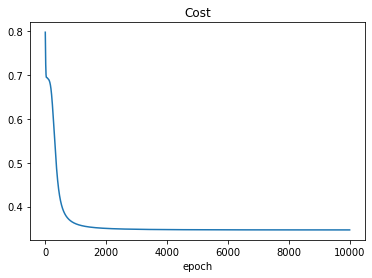

In [74]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [75]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]}) 
print(test1[0][0])

0.500002


In [76]:
for i in range(4):  
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})  
  print(i, x_data[i], y_data[i] , '---- predicted : ',test1 )

0 [0. 0.] [0.] ---- predicted :  [[4.46246e-05]]
1 [0. 1.] [1.] ---- predicted :  [[0.999967]]
2 [1. 0.] [1.] ---- predicted :  [[0.49998683]]
3 [1. 1.] [0.] ---- predicted :  [[0.500002]]


In [77]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 
print(acc1)

0.5


In [78]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]}) 
print(test1[0][0])

0.00012424396
